### Storing Your Model

Now you have all the knowledge needed to go full circle on creating and putting your model in production. Let's put that knowledge to practice with some code!

In the cell below is a replication of the code you put together in the previous notebook - this code:

1. Creates **train** and **test** datasets
2. Creates three models: 
 * **model_factorization**
 * **model_popular**
 * **model_itemsim**

Run the cell below to get started with these three models.

In [1]:
# run this cell to read in the libraries and data needed
import numpy as np
import pandas as pd
import turicreate as tc
import solution_part3 as sp

ratings_dat = pd.read_csv('../../../data/ratings.dat', sep='::', engine='python', \
                          header=None, names=['user_id', 'movie_id','rating','time'])

ratings_dat2 = ratings_dat.copy(deep=True)
ratings_dat2.columns = ['user_id', 'item_id', 'rating', 'time']
ratings_sframe = tc.SFrame(ratings_dat2[['user_id', 'item_id', 'rating']])

train, test = tc.recommender.util.random_split_by_user(ratings_sframe, 
                                                       user_id = 'user_id',
                                                       item_id = 'item_id',
                                                       max_num_users=None)

# creating your three models of interest
model_factorization = tc.factorization_recommender.create(train, target='rating')
model_popular = tc.popularity_recommender.create(train, target='rating')
model_itemsim = tc.item_similarity_recommender.create(train, target='rating',  similarity_type='cosine')

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.013878s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 7138 / 7138 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | No Decrease (14.2562 >= 3.07871)         |

| 4       | 0.0976562         | 0.904705                                 |

| 5       | 0.0488281         | 1.29033                                  |

| 6       | 0.0244141         | 1.63838                                  |

| 7       | 0.012207          | 1.95874                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.904705                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 148us        | 3.07871           | 1.75463               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 87.365ms     | 2.56009           | 1.60002               | 0.0976562   |

| 2       | 174.971ms    | 1.59032           | 1.26108               | 0.0580668   |

| 3       | 262.351ms    | 1.31728           | 1.14773               | 0.042841    |

| 4       | 361.12ms     | 1.18143           | 1.08694               | 0.0345267   |

| 5       | 455.324ms    | 1.07961           | 1.03904               | 0.029206    |

| 10      | 935.754ms    | 0.59017           | 0.768223              | 0.017366    |

| 50      | 4.79s        | 0.0932073         | 0.305282              | 0.00519365  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.0884351

Final training RMSE: 0.297363

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.016501s

7138 observations to process; with 1704 unique items.

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.016432s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 645us                          | 33.5       |

| 17.959ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 22.033ms                            | 0                | 0               |

| 41.67ms                             | 100              | 1704            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.049217s

Since the `rating` is being used, you will notice the metric being used is `RMSE`.  Use the [`evaluate_rmse`](https://apple.github.io/turicreate/docs/api/generated/turicreate.recommender.factorization_recommender.FactorizationRecommender.evaluate_rmse.html?highlight=evaluate_rmse#turicreate.recommender.factorization_recommender.FactorizationRecommender.evaluate_rmse) method of each of the 3 above models to compare how well each model performs on the `train` data.  

Then answer the following question regarding your results.

In [2]:
model_factorization.evaluate_rmse(train, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 2967
 
 Data:
 +---------+-----------------------+-------+
 | user_id |          rmse         | count |
 +---------+-----------------------+-------+
 |   2871  |  0.031809476305895444 |   2   |
 |   2464  |  0.002879260534260908 |   1   |
 |   232   |  0.45246488581052663  |   6   |
 |   363   |  0.005085785912509522 |   1   |
 |   2444  |   0.6473253302439788  |   2   |
 |   2238  |  0.010912091976191363 |   1   |
 |   431   | 0.0057842568101635905 |   1   |
 |   738   |  0.48602523100866535  |   3   |
 |   1860  |  0.011134733073379297 |   2   |
 |   2661  |   0.8007173979619927  |   5   |
 +---------+-----------------------+-------+
 [2967 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 1704
 
 Data:
 +---------+-----------------------+--

In [3]:
model_itemsim.evaluate_rmse(train, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 2967
 
 Data:
 +---------+--------------------+-------+
 | user_id |        rmse        | count |
 +---------+--------------------+-------+
 |   2871  | 8.032106385604056  |   2   |
 |   2464  |        10.0        |   1   |
 |   232   | 5.719191506539028  |   6   |
 |   363   |        8.0         |   1   |
 |   2444  | 7.649102590799475  |   2   |
 |   2238  |        9.0         |   1   |
 |   431   |        8.0         |   1   |
 |   738   | 4.0471527341173426 |   3   |
 |   1860  | 7.341026782989502  |   2   |
 |   2661  | 4.290789104419295  |   5   |
 +---------+--------------------+-------+
 [2967 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 1704
 
 Data:
 +---------+--------------------+-------+
 | item_id |        rmse        | coun

In [4]:
model_popular.evaluate_rmse(train, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 2967
 
 Data:
 +---------+--------------------+-------+
 | user_id |        rmse        | count |
 +---------+--------------------+-------+
 |   2871  | 0.5892556509887901 |   2   |
 |   2464  | 1.313463514902363  |   1   |
 |   232   | 1.1858326130416144 |   6   |
 |   363   | 0.1403508771929829 |   1   |
 |   2444  | 1.334166406412633  |   2   |
 |   2238  | 1.833333333333333  |   1   |
 |   431   | 0.4226804123711343 |   1   |
 |   738   | 1.1547005383792517 |   3   |
 |   1860  | 0.5700837992665859 |   2   |
 |   2661  | 1.1627553482998907 |   5   |
 +---------+--------------------+-------+
 [2967 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 1704
 
 Data:
 +---------+-------------------+-------+
 | item_id |        rmse       | count 

**Question 1:** Based on the results, which of the following are True?  

**Add all of the True items statements to the `your_answer` list.**

That's right - lower RMSEs are best.  The lowest training RMSE can be found in relation to the matrix factorization recommender, which makes it the best.  However, the best training score doesn't mean this is the model we should use in production necessarily!


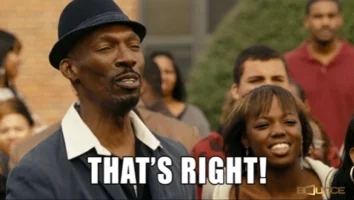

In [5]:
a = "the HIGHER the rmse, the BETTER the recommender"
b = "using the train results, the best model is the popularity model"
c = "using the train results, the best model is the item similarity model"
d = "using the train results, the best model is the matrix factorization model"
e = "the recommender that works best for the training data is the one we should use in the real world"


your_answer = [d]

sp.answer_one(your_answer)

Now that you have looked at how well each model fits the `train`ing data, `evaluate` how well each model works on the `test` data.  Use your results to answer the following question.

In [6]:
model_factorization.evaluate_rmse(test, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 1241
 
 Data:
 +---------+---------------------+-------+
 | user_id |         rmse        | count |
 +---------+---------------------+-------+
 |   2043  |  1.2676424965800983 |   1   |
 |   2238  |  0.0697765364704388 |   1   |
 |   738   |  3.3239365988018266 |   1   |
 |   2661  |  1.348806963728582  |   1   |
 |   764   |  2.2687885614880967 |   4   |
 |   926   |  1.2786145493926746 |   1   |
 |   1323  |  1.5512363328991192 |   1   |
 |   2501  | 0.17391055965998348 |   1   |
 |   3172  |  0.4909212921549475 |   1   |
 |   1685  |  0.6444746363769039 |   3   |
 +---------+---------------------+-------+
 [1241 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 616
 
 Data:
 +---------+--------------------+-------+
 | item_id |        rmse 

In [7]:
model_popular.evaluate_rmse(test, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 1241
 
 Data:
 +---------+--------------------+-------+
 | user_id |        rmse        | count |
 +---------+--------------------+-------+
 |   2043  | 1.313463514902363  |   1   |
 |   2238  | 1.313463514902363  |   1   |
 |   738   | 0.4226804123711343 |   1   |
 |   2661  | 1.3614457831325302 |   1   |
 |   764   | 3.2083460190064526 |   4   |
 |   926   | 1.313463514902363  |   1   |
 |   1323  | 0.686536485097637  |   1   |
 |   2501  |        1.0         |   1   |
 |   3172  | 0.2857142857142865 |   1   |
 |   1685  | 0.9604076436730911 |   3   |
 +---------+--------------------+-------+
 [1241 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 616
 
 Data:
 +---------+--------------------+-------+
 | item_id |        rmse        | count

In [8]:
model_itemsim.evaluate_rmse(test, target='rating')

{'rmse_by_user': Columns:
 	user_id	int
 	rmse	float
 	count	int
 
 Rows: 1241
 
 Data:
 +---------+--------------------+-------+
 | user_id |        rmse        | count |
 +---------+--------------------+-------+
 |   2043  | 9.954843915700913  |   1   |
 |   2238  | 9.314554512500763  |   1   |
 |   738   |        8.0         |   1   |
 |   2661  |        9.0         |   1   |
 |   764   | 5.0990195135927845 |   4   |
 |   926   | 8.680874049663544  |   1   |
 |   1323  | 7.9695993065834045 |   1   |
 |   2501  |        8.0         |   1   |
 |   3172  |        8.0         |   1   |
 |   1685  | 7.636629733420268  |   3   |
 +---------+--------------------+-------+
 [1241 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_item': Columns:
 	item_id	int
 	rmse	float
 	count	int
 
 Rows: 616
 
 Data:
 +---------+-------------------+-------+
 | item_id |        rmse       | count |

**Question 2:** Based on the results, which of the following are True?  

**Add all of the True items statements to the `your_answer` list.**

That's right the popularity model performed best in relation to the test data.  You could argue that the recommender that performed best with the test data should be used, or that we should do more rigorous testing with cross-validation to determine which model goes to production.  Eitherway, more testing should be done once the model is in production.


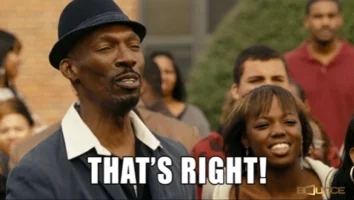

In [9]:
a = "using the test results, the best model is the popularity model"
b = "using the test results, the best model is the item similarity model"
c = "using the test results, the best model is the matrix factorization model"
d = "the recommender that works best for the test data is the one we should use in the real world"

your_answer = [a, d]

sp.answer_two(your_answer)

Consider a situation in which you only know if an individual watched a movie or not, but you don't know the rating.  Below a new `ratings_dat` is created with a removed rating.  The training and testing data is again created for you.

In [10]:
ratings_sframe = tc.SFrame(ratings_dat2[['user_id', 'item_id']])

train, test = tc.recommender.util.random_split_by_user(ratings_sframe, 
                                                       user_id = 'user_id',
                                                       item_id = 'item_id',
                                                       max_num_users=None)

Use the space below to **create** each of the same models as was done above using the **train** data, but instead of using the ratings, you will only use the user-item interactions.  The three types of models you should create include:

1. `ranking_factorization_recommender` 
2. `popularity_recommender`
3. `item_similarity_recommender`

**Notice:** the `ranking_factorization_recommender` is needed in the cases of having classification data, rather than `factorization_recommender` which is used with ratings (regression) data.

In [11]:
# creating your three models of interest
model_factorization = tc.ranking_factorization_recommender.create(train)
model_popular = tc.popularity_recommender.create(train)
model_itemsim = tc.item_similarity_recommender.create(train)

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.011925s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| binary_target                  | Assume Binary Targets                            | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 7138 / 7138 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (5.04002 >= 1.38646)         |

| 1       | 6.25              | No Decrease (3.89266 >= 1.38646)         |

| 2       | 1.5625            | 1.21933                                  |

| 3       | 0.78125           | 0.978127                                 |

| 4       | 0.390625          | 0.98644                                  |

| 5       | 0.195312          | 1.00075                                  |

| 6       | 0.0976562         | 1.01803                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.78125           | 0.978127                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training Predictive Error | Step Size   |

+---------+--------------+-------------------+-----------------------------------+-------------+

| Initial | 123us        | 1.38646           | 0.693163                          |             |

+---------+--------------+-------------------+-----------------------------------+-------------+

| 1       | 77.349ms     | 1.2624            | 0.682374                          | 0.78125     |

| 2       | 156.491ms    | 1.15651           | 0.604185                          | 0.464534    |

| 3       | 237.338ms    | 1.08905           | 0.558818                          | 0.342728    |

| 4       | 246.247ms    | 1.05768           | 0.53744                           | 0.276214    |

| 5       | 308.284ms    | 1.04655           | 0.528603                          | 0.233648    |

| 10      | 666.954ms    | 0.998782          | 0.500178                          | 0.138928    |

| 25      | 1.55s        | 0.931247          | 0.45821                           | 0.0174693   |

+---------+--------------+-------------------+-----------------------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training Predictive Error.

Final objective value: 0.921599

Final training Predictive Error: 0.464014

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.013029s

7138 observations to process; with 1704 unique items.

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.01348s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 377us                          | 33.5       |

| 831us                          | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 8.832ms                             | 0                | 0               |

| 29.023ms                            | 100              | 1704            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.034159s

Since only the user-item relationships are being used, not ratings, you will notice `RMSE` is not used.  Instead, you will want to look at metrics associated with classification problems.

You may remember from earlier sections some of these metrics include **precision**, **recall**, and **f1-scores**.  You will then use the [`evaluate`](https://apple.github.io/turicreate/docs/api/generated/turicreate.recommender.factorization_recommender.FactorizationRecommender.evaluate.html) method of each of the 3 above models to compare how well each model performs on the `test` data.  

The results for each model are based on a `cutoff` value. Depending on which metric you would like to optimize on, you can choose a different cutoff.  Notice that by increasing the **precision**, you decrease the **recall** (and vice-versa).

Use the below slots to take a look at the precision-recall values for each model.

In [12]:
results_popular = model_popular.evaluate(test)
results_popular['precision_recall_overall']

recommendations finished on 1000/1241 queries. users per second: 153116


Precision and recall summary statistics by cutoff
+--------+----------------------+---------------------+
| cutoff |    mean_precision    |     mean_recall     |
+--------+----------------------+---------------------+
|   1    | 0.23932312651087834  | 0.20010072522159555 |
|   2    |  0.1498791297340854  |  0.2467700778941714 |
|   3    | 0.11952726295997856  |  0.2890075208165458 |
|   4    | 0.10072522159548751  |  0.3189632017190438 |
|   5    | 0.08976631748589846  | 0.35162503357507385 |
|   6    | 0.08058017727639008  | 0.37754499059897917 |
|   7    | 0.07252215954875094  |  0.3960448562986838 |
|   8    | 0.06678082191780828  | 0.41706285253827563 |
|   9    | 0.06168860238159192  |  0.433246038141284  |
|   10   | 0.057373086220789675 | 0.44324469513832915 |
+--------+----------------------+---------------------+
[10 rows x 3 columns]



cutoff,precision,recall
1,0.23932312651087834,0.20010072522159564
2,0.1498791297340854,0.24677007789417146
3,0.11952726295997856,0.28900752081654574
4,0.10072522159548751,0.3189632017190439
5,0.08976631748589847,0.3516250335750739
6,0.08058017727639005,0.3775449905989792
7,0.072522159548751,0.39604485629868375
8,0.06678082191780825,0.41706285253827563
9,0.0616886023815919,0.4332460381412838
10,0.05737308622078969,0.44324469513832926


In [13]:
results_itemsim = model_itemsim.evaluate(test)
results_itemsim['precision_recall_overall']

recommendations finished on 1000/1241 queries. users per second: 125960


Precision and recall summary statistics by cutoff
+--------+----------------------+---------------------+
| cutoff |    mean_precision    |     mean_recall     |
+--------+----------------------+---------------------+
|   1    | 0.06929895245769539  | 0.05059092130002687 |
|   2    | 0.06970185334407739  | 0.10595621810367986 |
|   3    | 0.06016653236637121  |  0.1380808487778673 |
|   4    | 0.055600322320709106 | 0.16691512221326885 |
|   5    | 0.05318291700241743  | 0.20026188557614832 |
|   6    | 0.05036261079774377  | 0.22786059629331182 |
|   7    | 0.05686658224933809  | 0.31813725490196076 |
|   8    | 0.052377115229653506 | 0.33418614020950843 |
|   9    | 0.050049243441668896 | 0.36037469782433523 |
|   10   | 0.04721998388396452  |  0.3762892828364221 |
+--------+----------------------+---------------------+
[10 rows x 3 columns]



cutoff,precision,recall
1,0.06929895245769542,0.050590921300026875
2,0.06970185334407739,0.10595621810367983
3,0.0601665323663712,0.13808084877786733
4,0.05560032232070912,0.16691512221326885
5,0.05318291700241745,0.20026188557614832
6,0.05036261079774374,0.2278605962933118
7,0.056866582249338105,0.31813725490196065
8,0.052377115229653506,0.3341861402095084
9,0.05004924344166891,0.3603746978243353
10,0.04721998388396452,0.37628928283642216


In [14]:
results_fact = model_factorization.evaluate(test)
results_fact['precision_recall_overall']

recommendations finished on 1000/1241 queries. users per second: 93449.2


Precision and recall summary statistics by cutoff
+--------+----------------------+---------------------+
| cutoff |    mean_precision    |     mean_recall     |
+--------+----------------------+---------------------+
|   1    | 0.24254633360193392  | 0.20231668009669623 |
|   2    | 0.15028203062046736  | 0.24793849046467897 |
|   3    | 0.11872146118721462  |  0.2842532903572387 |
|   4    |  0.1007252215954875  |  0.3189632017190439 |
|   5    | 0.09041095890410959  | 0.35370668815471396 |
|   6    | 0.08044587698092934  |  0.3772092398603277 |
|   7    | 0.07240704500978473  | 0.39527262959978504 |
|   8    |  0.0667808219178082  | 0.41760005372011794 |
|   9    | 0.061599068851284806 |  0.4313658340048347 |
|   10   | 0.05761482675261884  |  0.4467365028203061 |
+--------+----------------------+---------------------+
[10 rows x 3 columns]



cutoff,precision,recall
1,0.24254633360193392,0.20231668009669615
2,0.15028203062046736,0.24793849046467883
3,0.11872146118721459,0.2842532903572385
4,0.10072522159548752,0.31896320171904363
5,0.09041095890410956,0.3537066881547141
6,0.08044587698092932,0.3772092398603276
7,0.07240704500978468,0.39527262959978493
8,0.06678082191780825,0.41760005372011827
9,0.06159906885128479,0.4313658340048347
10,0.05761482675261888,0.4467365028203063


**Question 3:** Write a function that takes in the dataframe from `results['precision_recall_overall']` and adds a column for `f1_score` for each `cutoff`.

In [15]:
def create_f1score(df):
    '''
    input:
        df: dataframe with cutoff, precision, and recall
    
    return:
        df: datafra,e with cutoff, precision, recall, and f1_score
    '''
    num = df['precision']*df['recall']
    den = df['precision']+df['recall']
    df['f1_score'] = 2*(num/den)
    
    return df


In [16]:
# try your function out
create_f1score(results_fact['precision_recall_overall'])

cutoff,precision,recall,f1_score
1,0.24254633360193392,0.20231668009669615,0.22061249181399464
2,0.15028203062046736,0.24793849046467883,0.187136010542452
3,0.11872146118721459,0.2842532903572385,0.16748923275786037
4,0.10072522159548752,0.31896320171904363,0.15310233682514102
5,0.09041095890410956,0.3537066881547141,0.14401121440972114
6,0.08044587698092932,0.3772092398603276,0.13261046141170657
7,0.07240704500978468,0.39527262959978493,0.12239370080156117
8,0.06678082191780825,0.41760005372011827,0.11514771215367446
9,0.06159906885128479,0.4313658340048347,0.10780375460810901
10,0.05761482675261888,0.4467365028203063,0.10206633632098389


In [17]:
create_f1score(results_popular['precision_recall_overall'])

cutoff,precision,recall,f1_score
1,0.23932312651087834,0.20010072522159564,0.21796145561202543
2,0.1498791297340854,0.24677007789417146,0.18649065122476782
3,0.11952726295997856,0.28900752081654574,0.16911303178995435
4,0.10072522159548751,0.3189632017190439,0.15310233682514104
5,0.08976631748589847,0.3516250335750739,0.1430208558641632
6,0.08058017727639005,0.3775449905989792,0.1328136693007667
7,0.072522159548751,0.39604485629868375,0.12259517757565415
8,0.06678082191780825,0.41706285253827563,0.11512726756302641
9,0.0616886023815919,0.4332460381412838,0.10799948272791132
10,0.05737308622078969,0.44324469513832926,0.10159573653991538


In [18]:
create_f1score(results_itemsim['precision_recall_overall'])

cutoff,precision,recall,f1_score
1,0.06929895245769542,0.050590921300026875,0.058485303888907506
2,0.06970185334407739,0.10595621810367983,0.08408773606913085
3,0.0601665323663712,0.13808084877786733,0.08381291908340556
4,0.05560032232070912,0.16691512221326885,0.08341474556694127
5,0.05318291700241745,0.20026188557614832,0.08404600237199457
6,0.05036261079774374,0.2278605962933118,0.08249243222551292
7,0.056866582249338105,0.31813725490196065,0.09648636403238645
8,0.052377115229653506,0.3341861402095084,0.0905606300010133
9,0.05004924344166891,0.3603746978243353,0.08789195350540341
10,0.04721998388396452,0.37628928283642216,0.0839102011100769


**Question 4:** Using each of your models and looking at the **f1-score** for each of the test sets, is the precision-recall consistent with your findings using rmse in terms of which modeling technique you should use?

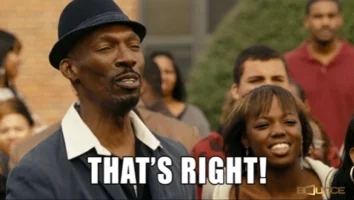

In [19]:
a = "the most popular recommender is the best, which matches what we got from rmse test"
b = "the item similarity recommender is best, which does not match what we got from rmse test"
c = "the factorization recommender is best, which does not match we got from rmse test"
d = "we can't be sure based on the results which is best"

your_answer = c

sp.answer_four(your_answer)

**Question 5:** Precision in this case means ...

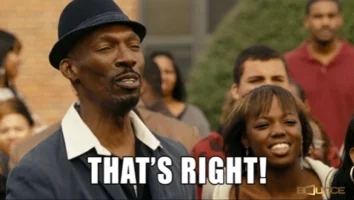

In [20]:
a = "of all the movies, the propotion you got right as watching or right as not watching"
b = "of the movies we recommended, the proportion they actually watched"
c = "of the movies that they actually watched, the proportion you recommended"
d = "none of the above"

your_answer = b

sp.answer_five(your_answer)

**Question 6:** Recall in this case means...

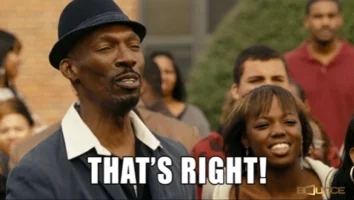

In [21]:
a = "of all the movies, the propotion you got right as watching or right as not watching"
b = "of the movies we recommended, the proportion they actually watched"
c = "of the movies that they actually watched, the proportion you recommended"
d = "none of the above"

your_answer = c

sp.answer_six(your_answer)

Now that you have found the best model based on the test set, it is important that you make sure your model performs well in the real world.  In order to re-use models for new situations, you will want to save them.  Look at the [`save`](https://apple.github.io/turicreate/docs/userguide/recommender/using-trained-models.html) method at the bottom of the page here, and use it to save one of your models.

In [22]:
# put some recommendations here, so you can compare with the loaded model
new_user = tc.SFrame({'user_id': [0]})
model_factorization.recommend(new_user, k=3)

user_id,item_id,score,rank
0,8579674,0.9935514666773968,1
0,8367814,0.9744265409877481,2
0,2584384,0.968779000498379,3


In [23]:
pth = './factor_model.model'
model_factorization.save(pth)

Now use the load method **link** and use it to load your existing model

In [24]:
# load the model here and make sure the recommendations match from before
loaded_model = tc.load_model(pth)
loaded_model.recommend(new_user, k=3)

user_id,item_id,score,rank
0,8579674,0.9935514666773968,1
0,8367814,0.9744265409877481,2
0,2584384,0.968779000498379,3


You may also want to do as you did earlier and store the results in a `json` format to be used by other engineering groups.  You could then imagine updating data files, re-creating your models, and then creating new predictions.  

Congratulations! You have successfully completed all parts of this workshop aimed at creating a recommendation system from Start to Finish!


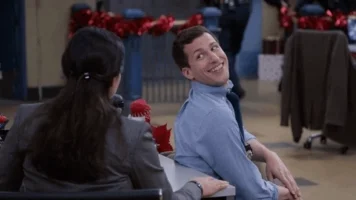

In [25]:
# run this for good measure
sp.end_value()

In [ ]:
}